**LangChain : - Chat with your own data using RAG**

**Overview**:
This notebook demonstrates how to build a transformer-based chatbot using LangChain with the Retrieval-Augmented Generation (RAG) approach. The chatbot can answer user questions by intelligently retrieving and processing content from custom data sources.

**Key Highlights:**
1. PDF Upload: A pdf file was uploaded and processed to serve as the knowledge base for the chatbot.

2. Document Loading: The PDF content was converted into LangChain Document objects using built-in loaders.

3. Document Splitting into Chunks: The loaded document was split into smaller chunks (e.g., 400–1000 characters) using tools like CharacterTextSplitter.
These chunks preserve meaningful context while fitting within the input limits of the LLM.

4. Embeddings & Vector Store: Each chunk was embedded into a high-dimensional vector using a transformer-based embedding model.The resulting vectors were stored in a vector database (e.g., FAISS) for fast semantic search.

5. Retrieval Pipeline: When a user asks a question, the system retrieves the most relevant chunks from the vector store.These chunks are passed into the LLM as context for answering the question.

6. Question Answering: The chatbot uses a RetrievalQA chain to generate accurate, grounded answers based on the content of the uploaded PDF.

It successfully responded to basic and context-aware questions about topics from the document.

This pipeline demonstrates how to turn any document into a searchable knowledge base and build an interactive chatbot using LangChain.

Note: The code contains a masked OPENAI_API_KEY value set as "xxxx".
Please replace "xxxx" with your actual OpenAI API key to run the code successfully.














In [ ]:
import os, tempfile

In [ ]:
os.environ["OPENAI_API_KEY"] = "XXXX"

In [ ]:
!pip install -q langchain==0.0.150 pypdf pandas matplotlib tiktoken textract transformers openai faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.4/648.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 43.2 M

In [ ]:
!pip install langchain
!pip install openai
!pip install streamlit
!pip install tiktoken
!pip install chromadb
!pip install pypdf
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%%writefile app.py
import os, tempfile


Writing app.py


In [ ]:
import streamlit as st

In [ ]:
from langchain.llms.openai import OpenAI

In [ ]:
from langchain.vectorstores.chroma import Chroma

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings

In [ ]:
from langchain.chains.summarize import load_summarize_chain

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
loader = PyPDFLoader("SQL.pdf")
pages = loader.load_and_split()
print(pages[0])


page_content='Type text here' metadata={'source': 'SQL.pdf', 'page': 0}


In [ ]:
chunks = pages


In [ ]:
import textract
doc = textract.process("SQL.pdf")



In [ ]:
with open('SQL.txt', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('SQL.txt', 'r') as f:
    text = f.read()

In [ ]:
!pip install transformers

In [ ]:
from transformers import GPT2TokenizerFast

In [ ]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 512,
    chunk_overlap  = 24,
    length_function = count_tokens,
)


In [ ]:
chunks = text_splitter.create_documents([text])

Token indices sequence length is longer than the specified maximum sequence length for this model (1097 > 1024). Running this sequence through the model will result in indexing errors


In [ ]:
# Result is many LangChain 'Documents' around 500 tokens or less (Recursive splitter sometimes allows more tokens to retain context)
type(chunks[0])


langchain.schema.Document

In [ ]:
# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]


In [ ]:
! pip install pd

In [ ]:
import pandas as pd

In [ ]:
# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})


In [ ]:
import matplotlib.pyplot as plt

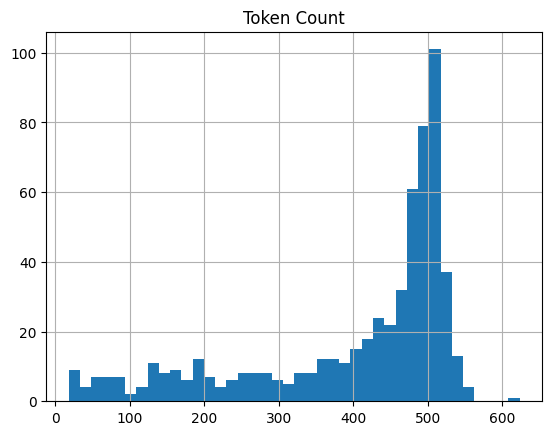

In [ ]:
# Create a histogram of the token count distribution
df.hist(bins=40, )
plt.show()


In [ ]:
embeddings = OpenAIEmbeddings()

In [ ]:
pip install openai[embeddings]

In [ ]:
pip install --upgrade openai

In [ ]:
from langchain.vectorstores import FAISS

In [ ]:
db = FAISS.from_documents(chunks, embeddings)

AttributeError: module 'openai' has no attribute 'error'

In [ ]:
from langchain.chains.question_answering import load_qa_chain

In [ ]:
chain = load_qa_chain(OpenAI(temperature=0), chain_type="stuff")

In [ ]:
query = "What is Star?"

In [ ]:
docs = db.similarity_search(query)

In [ ]:
chain.run(input_documents=docs, question=query)

' STAR stands for Situation, Task, Action, and Result. It is a technique used to structure answers to behavioral questions in interviews. It involves describing a situation, the task you were given, the action you took, and the result of your action. This technique helps to provide a clear and concise answer to the interviewer.'

In [ ]:
from IPython.display import display



In [ ]:
import ipywidgets as widgets

In [ ]:
from langchain.chains import ConversationalRetrievalChain

In [ ]:
qa = ConversationalRetrievalChain.from_llm(OpenAI(temperature=0.1), db.as_retriever())

In [ ]:
chat_history = []

In [ ]:
def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))
print("Welcome to the Transformers chatbot! Type 'exit' to stop.")
input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)


Welcome to the Transformers chatbot! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

HTML(value='<b>User:</b> What is Situat')

HTML(value='<b><font color="blue">Chatbot:</font></b>  A situational or hypothetical question is a type of int…

HTML(value='<b>User:</b> Can you please list down hypothetical questions')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Hypothetical questions are designed to assess how you w…